In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random
import seaborn as sns
import math
import json

In [26]:
#Model Variables and Parameters
average_age=20
# Average ages in base year for underground and overhead distribution lines (in years)
age_shape=10
# We selected age shape and scale in a way that age_shape*age_scale=average_age
age_scale=2
# We selected age shape and scale in a way that age_shape*age_scale=average_age
length_shape=2
# We selected length shape and scale in a way that length_shape*length_age=average_length
length_scale=0.25
# We selected age shape and scale in a way that length_shape*age scale=average_length
average_length=0.5
# Average length for underground and overhead distribution lines (in miles)
segment_number= 625
# Numbers of line segments in the network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach segment's length is considered about 0.5 miles. So by dividing (91.5+121.7)/.5 we calculated this parameter.
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
overhead_baseyear=191
#Length of overhead lines in miles in base year
r=0.1
# Discount rate=10%
easment_value=3000
# per-acre price of a conservation easement
nfir=2100
# Non-fatality incidence rates, number of accidents per 100000 workers
fir=15
# Fatality incidence rates, number of accidents per 100000 workers
employees=8514/255
#The number of IOU employees
injurycost=130658
#A randomly determined annual injury cost, per accident
vsl=6900000
#The value of a statistical life
# changing underground replcost to 285600
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':60}
underground_line={'lifespan':40,'replcost':285600,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':120,'over_under_raplcost':357000}
# the above two dictionaries shows related parameters for overhead and underground lines and the parameters are as follows:
#lifespan=Useful lifespan of overhead line and underground lines
#replcost=Cost associated with replacing a line with the same line type after it reaches its life span. 
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of line
# corridor_length= length of the corridor in feet needed for calculating environmental cost.
# over_under_raplcost= replacement cost associated with replacing an overhead line with an underground line.
###

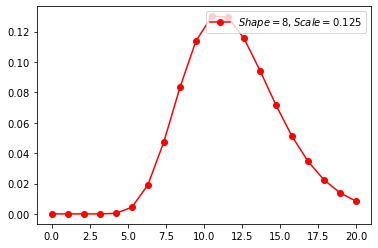

In [3]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, age_shape, age_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segment age

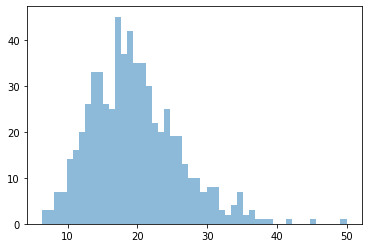

[16.65836931 14.18428819 14.41357988 21.99465196 24.87419778 21.25250469
 22.48283434 21.73417517 19.28110704 20.01618397 22.42775025 22.16302673
 20.22728746 20.39709496 26.85257073 16.35926108  8.68329284 24.54158553
 22.95448437 25.43793404 24.46913125 31.55037988 26.97111072 12.25381915
 17.27314274 10.19096689 10.31469377 10.89156109 17.43623558 23.19056299
 27.23542824 34.22178605 44.80809401 19.62044439 27.51062436 18.88810454
 17.59961461 23.58385988 17.87203037 21.63576393 14.23471123 20.18179472
 13.60897025 14.70769817 16.6833922  16.47453637 14.96608578 19.36821808
 16.16805552 20.31475215 17.09496816 14.55276995 12.5186163  19.16443982
 21.02861851 17.06200679 18.85958845  8.1756166  21.57578792 12.99729285
 27.00414427 17.66680945 21.28733363 20.38436056 24.40925445 11.06816303
 16.5375348  19.26002974 30.03860422 13.74700077 20.9153369  37.28760031
 20.07698982 20.79908481 16.42068119 18.43634275 17.54825081 17.06846793
 24.81617184 24.25144719 13.61281237 21.31465902 35

In [4]:
age=np.random.gamma(age_shape,age_scale,segment_number)
plt.hist(np.random.gamma(age_shape,age_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined segment's ages in the base year

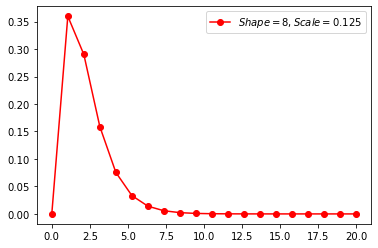

In [5]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, length_shape, length_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segments length
#length_shape*length_scale=average_length=0.5

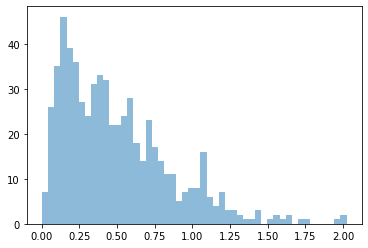

[0.48675766 0.7554671  0.46050118 1.01407019 0.23040491 1.0475674
 0.24914793 0.31407828 0.59351029 0.46942918 0.30527885 0.65997193
 0.65136987 0.62523322 0.63901347 0.1324087  0.80273416 0.76774173
 0.4794327  0.64242239 0.26401893 0.87308525 0.25084    0.27073653
 0.40567409 0.32020946 0.47520006 0.28681925 0.31980592 0.31708556
 0.25462883 1.08712468 1.48499305 0.64070542 0.5396232  0.31525963
 0.32450286 0.44339413 0.6481405  0.62003531 0.30624587 1.16793314
 0.83884325 0.75805289 0.30338398 0.4700705  0.34680575 0.33220058
 0.70728586 0.89384963 0.06478871 0.92935845 0.44881787 1.42938259
 0.31227854 0.55718208 0.22592902 0.19544567 0.64323139 0.46025117
 0.22279327 0.201544   0.27504834 1.76779865 0.78058648 0.23291646
 1.35221137 0.08991401 0.80203984 0.27456503 1.04935089 0.57494991
 0.42387398 0.18642511 0.84945957 0.37141058 0.30797189 0.29116511
 0.3498681  0.56686292 0.3515468  0.72081807 0.17372189 0.98315786
 0.28423335 0.4573822  0.39907094 0.28688386 0.36197824 0.18171

In [6]:
length=np.random.gamma(length_shape,length_scale,segment_number)
plt.hist(np.random.gamma(length_shape,length_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (length)
#Randomly determined circuit's ages in the base year

In [7]:
#Defining Line segment class with required attributes and methods and these methods are going to be modified based on requirements for each strategies in the simulations.
class Line_segment:
    ## The __init__ function as the constructor, which assigns random length, age and underground status for the base year to each line segment.
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        self.opex=[self.calculate_opex()]
        self.environmental_restoration=[]
    ###Lifecycle Infrastructure Costs:
    # Add one year to the age of line segment,compare it to the lifespan, starts from 1 when reaches to lifespan and append this age to age list. Also append underground status to its list.
    def update_age_and_underground_statusQuo(self):
        if self.underground[-1]==1:
            lifespan_current= int(underground_line['lifespan'])
        else:
            lifespan_current= int(overhead_line['lifespan'])
        age_current=self.age[-1]
        if age_current<(lifespan_current-1):
            age_current+=1
            self.age.append(age_current)
            self.underground.append(self.underground[0])
        else:
            self.age.append(1)
            self.underground.append(self.underground[0])
            
    def update_age_and_underground_under_after_lifespan(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    
    #Add interest rate to the replacement cost and also cansider different replacementcost rate when underground=1        
    def add_replcost_intrest_rate(self):
        underground_current=self.underground[-1]
        underground_baseyear=self.underground[0]
        if underground_current==1:
            replcost_growth_rate_current=underground_line['replcost_growth_rate']
        else:
            replcost_growth_rate_current=overhead_line['replcost_growth_rate']
        if underground_current==underground_baseyear:        
            replcost_new=(self.replcost_rate[-1])+((replcost_growth_rate_current)*(self.replcost_rate[-1]))
            self.replcost_rate.append(replcost_new)
        else:
            replcost_new=underground_line['replcost']*((1+replcost_growth_rate_current)**(len(self.underground)-1))
            self.replcost_rate.append(replcost_new)
        return(self.replcost_rate)
    
    #Determine capital expenses which is replacement cost for each line segment based on the rate of replacement cost in that year and length of the circuit.
    def calculate_capex(self):
        if (self.age[-1])==1:
            length_current=self.length
            replcost_rate_current=self.replcost_rate[-1]
            replcost_new=(replcost_rate_current)*(length_current)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    
    #Determin operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def calculate_opex(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_percentage_replcost_current=underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost_current=overhead_line['om_percentage_replcost']
        length_current=self.length
        replcost_rate_current=self.replcost_rate[-1]
        opex=(om_percentage_replcost_current)*(length_current)*(replcost_rate_current)
        #opex_new=opex[-1]+om_growth_rate*opex[-1]
        #self.opex.append(opex)
        return(opex)
    
    #Add interest rate to opex.
    def add_opex_interest_rate(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_growth_rate=underground_line['om_growth_rate']
        else:
            om_growth_rate=overhead_line['om_growth_rate']
        opex_new=self.opex[-1]+(self.opex[-1]*om_growth_rate)
        self.opex.append(opex_new)
        return(self.opex)

    #Determin the first retirement year
    def determine_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
 
    ###Environmental Costs:
    #Determin environmental restoration cost based on the length of overhead and underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
    def calculate_environmental_restoration(self):
        environmental_restoration_current=0
        if self.underground[-1]==1:
            if self.underground[0]==1:
                corridor_length=overhead_line['corridor_length']
                self.environmental_restoration.append(environmental_restoration_current)
            else:
                corridor_length=underground_line['corridor_length']-overhead_line['corridor_length']
                environmental_restoration_current=((self.length)*(corridor_length)*640/5280*easment_value)
                self.environmental_restoration.append(environmental_restoration_current)
        else:
            corridor_length=underground_line['corridor_length']
            self.environmental_restoration.append(environmental_restoration_current)
        return(self.environmental_restoration)

    
    ###Safety and health Costs:
    #Return fatal cost which is one element of safety cost
    def calculate_non_fatal_cost(self):
        return(nfir*employees/100000*injurycost)
    
    #Return non-fatal cost which is one element of safety cost
    def calculate_fatal_cost(self):
        return(fir*employees/100000*vsl)

In [8]:
#run simulation for calculating cost elemnts of statusQuo strategy and assign a data frame to them.
def run_cost_simulation_statusQuo_strategy(years_of_analysis):
    global df_line_segment_array
    global df_cost_line_segment_statusQuo
    global net_present_value_statusQuo
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_statusQuo()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array[t]+line_segment_fatal_cost_array[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_statusQuo=pd.DataFrame([range(years_of_analysis), line_segment_underground_length_total_array,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array,line_segment_non_fatal_cost_array,line_segment_fatal_cost_array,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_statusQuo.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_statusQuo['year'] = df_cost_line_segment_statusQuo['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_statusQuo_strategy_cost=[]
    for index, row in df_cost_line_segment_statusQuo.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_statusQuo_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_statusQuo_strategy_cost)
    net_present_value_statusQuo=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    net_present_value_statusQuo.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    #print(df_line_segment_array)
    #print(net_present_value_statusQuo)
    #print(df_cost_line_segment_statusQuo)

In [9]:
run_cost_simulation_statusQuo_strategy(40)

In [10]:
df_line_segment_array

,length,base year age,base year underground
0,0.079991,16.943874,1.0
1,0.308548,24.124382,0.0
2,0.176920,30.414562,0.0
3,0.549931,22.522624,1.0
4,0.406945,20.350910,1.0
...,...,...,...
620,0.218497,17.515673,0.0
621,0.470228,13.355584,0.0
622,0.151094,28.053810,0.0
623,0.659512,17.883202,0.0


In [11]:
df_cost_line_segment_statusQuo

,year,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0,207.0,0.000000e+00,2.547809e+05,2.547809e+05,0.0,91611.240988,34556.823529,126168.064518,3.809489e+05
1,1,0.0,2.595191e+05,2.675199e+05,5.270390e+05,0.0,91611.240988,34556.823529,126168.064518,6.532071e+05
2,2,0.0,0.000000e+00,2.808959e+05,2.808959e+05,0.0,91611.240988,34556.823529,126168.064518,4.070640e+05
3,3,0.0,0.000000e+00,2.949407e+05,2.949407e+05,0.0,91611.240988,34556.823529,126168.064518,4.211087e+05
4,4,0.0,2.958830e+05,3.096877e+05,6.055707e+05,0.0,91611.240988,34556.823529,126168.064518,7.317387e+05
5,5,0.0,0.000000e+00,3.251721e+05,3.251721e+05,0.0,91611.240988,34556.823529,126168.064518,4.513402e+05
6,6,0.0,5.471811e+05,3.414307e+05,8.886118e+05,0.0,91611.240988,34556.823529,126168.064518,1.014780e+06
7,7,0.0,3.427878e+05,3.585022e+05,7.012901e+05,0.0,91611.240988,34556.823529,126168.064518,8.274581e+05
8,8,0.0,1.203043e+05,3.764274e+05,4.967317e+05,0.0,91611.240988,34556.823529,126168.064518,6.228997e+05
9,9,0.0,3.426199e+05,3.952487e+05,7.378686e+05,0.0,91611.240988,34556.823529,126168.064518,8.640367e+05


In [12]:
net_present_value_statusQuo

,Net present value of lifecycle infrastructure cost,Net present value of environmental cost,Net present value of safety cost,Net present value of total statusQuo strategy cost
0,1.005251e+07,0.0,1.357184e+06,1.140969e+07


In [20]:
#run simulation for calculating cost elemnts of undergrounding after lifespan strategy and assign a data frame to them.
def run_cost_simulation_under_after_lifespan_strategy(years_of_analysis):
    global df_line_segment_array
    global df_cost_line_segment_under_after_lifespan
    global df_net_present_value_under_after_lifespan
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    environmental_restoration_cost=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    #underground_length_new=[]
    underground_total=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_under_after_lifespan()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
            line_segment_environmental_restoration_cost_array[t]+=line_segment_array[i].environmental_restoration[t] 
            
    #Generating underground length new array
    underground_length_new=[0 for t in range (years_of_analysis)]
    for i in range (len(line_segment_array)):
        first_retire=line_segment_array[i].determine_first_retire()
        length=line_segment_array[i].length
        if int(first_retire)>years_of_analysis-1:
            pass
        else:
            if line_segment_array[i].underground[0]==0:
                underground_length_new[int(first_retire)]+=length
            if line_segment_array[i].underground[0]==1:
                underground_length_new[int(first_retire)]+=0
    zipped_lists = zip(line_segment_underground_length_total_array,underground_length_new)
    underground_length_total = [x + y for (x, y) in zipped_lists]
    new_underground_length_total=[]
    cumsum=0
    for ele in underground_length_total:
        cumsum+=ele
        new_underground_length_total.append(cumsum)
    underground_increase_rate=[1]
    for i in range (1,  len(new_underground_length_total)):
        devided= ((new_underground_length_total[i])/(new_underground_length_total[i-1]))
        underground_increase_rate.append(devided)
    line_segment_environmental_restoration_cost_array_multiply_new_under=[]
    for num1, num2 in zip(line_segment_environmental_restoration_cost_array, underground_length_new):
        line_segment_environmental_restoration_cost_array_multiply_new_under.append(num1 * num2)      
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array_under=[]
    for num1, num2 in zip(line_segment_non_fatal_cost_array, underground_increase_rate):
        line_segment_non_fatal_cost_array_under.append(num1 * num2)
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array_under=[]
    for num1, num2 in zip(line_segment_fatal_cost_array, underground_increase_rate):
        line_segment_fatal_cost_array_under.append(num1 * num2)
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array_under[t]+line_segment_fatal_cost_array_under[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array_multiply_new_under[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_under_after_lifespan=pd.DataFrame([range(years_of_analysis), new_underground_length_total,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array_multiply_new_under,line_segment_non_fatal_cost_array_under,line_segment_fatal_cost_array_under,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_under_after_lifespan.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_under_after_lifespan['year'] = df_cost_line_segment_under_after_lifespan['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_under_after_lifespan_strategy_cost=[]
    for index, row in df_cost_line_segment_under_after_lifespan.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_under_after_lifespan_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_under_after_lifespan_strategy_cost)
    df_net_present_value_under_after_lifespan=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    df_net_present_value_under_after_lifespan.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    print (total_total)
    #print(df_line_segment_array)
    #print(df_cost_line_segment_under_after_lifespan)
    #print(df_net_present_value_under_after_lifespan)

In [21]:
run_cost_simulation_under_after_lifespan_strategy(40)

15711142.435556673


In [22]:
df_line_segment_array

,length,base year age,base year underground
0,0.225738,14.731749,1.0
1,0.393963,15.801804,1.0
2,0.230192,22.443022,0.0
3,1.338145,12.747211,1.0
4,0.730179,21.059207,1.0
...,...,...,...
620,0.094513,22.820023,0.0
621,0.446444,20.714079,0.0
622,0.897063,17.769020,0.0
623,0.465529,22.937441,1.0


In [23]:
df_cost_line_segment_under_after_lifespan

,year,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0,213.000000,0.000000e+00,2.639125e+05,2.639125e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,3.900806e+05
1,1,213.000000,1.081787e+05,2.771081e+05,3.852868e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,5.114549e+05
2,2,213.000000,3.683676e+04,2.909635e+05,3.278003e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,4.539684e+05
3,3,213.000000,0.000000e+00,3.055117e+05,3.055117e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,4.316798e+05
4,4,213.000000,3.432895e+05,3.207873e+05,6.640768e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,7.902449e+05
5,5,213.000000,4.036851e+05,3.368267e+05,7.405118e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,8.666799e+05
6,6,213.000000,0.000000e+00,3.536680e+05,3.536680e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,4.798361e+05
7,7,213.000000,2.654757e+05,3.713514e+05,6.368271e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,7.629952e+05
8,8,213.000000,2.144960e+05,3.899190e+05,6.044149e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,7.305830e+05
9,9,213.000000,1.167223e+06,4.094149e+05,1.576638e+06,0.000000e+00,91611.240988,34556.823529,126168.064518,1.702806e+06


In [24]:
df_net_present_value_under_after_lifespan

,Net present value of lifecycle infrastructure cost,Net present value of environmental cost,Net present value of safety cost,Net present value of total statusQuo strategy cost
0,1.147679e+07,2.875238e+06,1.359112e+06,1.571114e+07
